In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics.pairwise import manhattan_distances
import missingno as msno
from sklearn.decomposition import PCA

In [2]:
df_o = pd.read_csv("../data/plant_recommand_final.csv")

In [3]:
df_o

,cntntsNo,cntntsSj,clCodeNm,fruit,succulent,vine,growthAra,growthHgI,lighttdemand,manage,watercycle
0,12938,가울테리아,1,1,0,0,1,1,2,58001,53003
1,12954,개운죽,0,0,0,0,2,2,1,58001,53002
2,12955,골드크레스트 '윌마',0,0,0,0,2,3,4,58002,53003
3,12957,공작야자,0,0,0,0,3,3,2,58003,53003
4,12962,관엽베고니아,1,0,0,0,2,1,2,58002,53003
...,...,...,...,...,...,...,...,...,...,...,...
212,12932,황금죽,0,0,0,0,2,3,2,58003,53003
213,12956,후피향나무,0,0,0,0,2,3,4,58001,53003
214,12920,흰꽃나도사프란,1,0,0,0,2,1,4,58001,53003
215,12919,흰줄무늬달개비(트라데스칸티아),0,0,0,1,2,1,2,58002,53003


In [4]:
df = df_o.drop(columns='cntntsSj')

In [5]:
df.head()

,cntntsNo,clCodeNm,fruit,succulent,vine,growthAra,growthHgI,lighttdemand,manage,watercycle
0,12938,1,1,0,0,1,1,2,58001,53003
1,12954,0,0,0,0,2,2,1,58001,53002
2,12955,0,0,0,0,2,3,4,58002,53003
3,12957,0,0,0,0,3,3,2,58003,53003
4,12962,1,0,0,0,2,1,2,58002,53003


In [6]:
df = df.set_index('cntntsNo')
df.head()

,clCodeNm,fruit,succulent,vine,growthAra,growthHgI,lighttdemand,manage,watercycle
cntntsNo,,,,,,,,,
12938,1,1,0,0,1,1,2,58001,53003
12954,0,0,0,0,2,2,1,58001,53002
12955,0,0,0,0,2,3,4,58002,53003
12957,0,0,0,0,3,3,2,58003,53003
12962,1,0,0,0,2,1,2,58002,53003


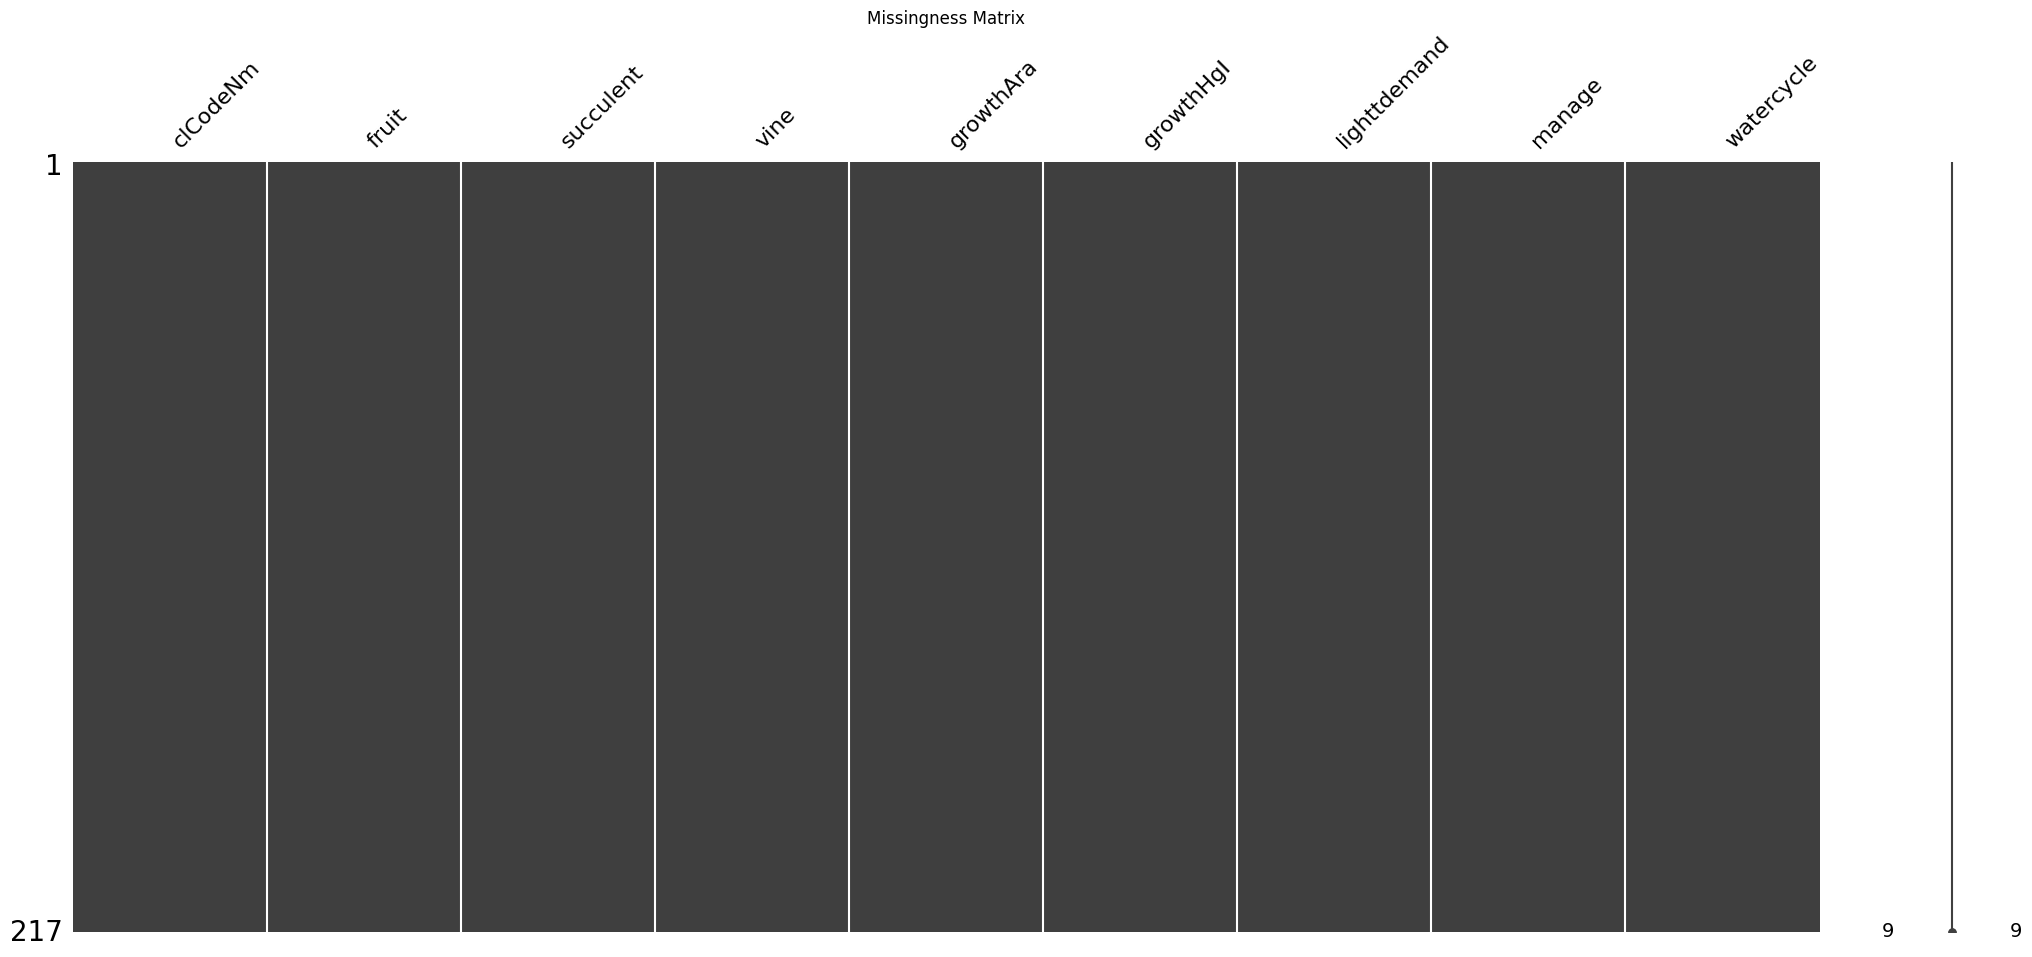

In [7]:
msno.matrix(df)
plt.title('Missingness Matrix')
plt.show()

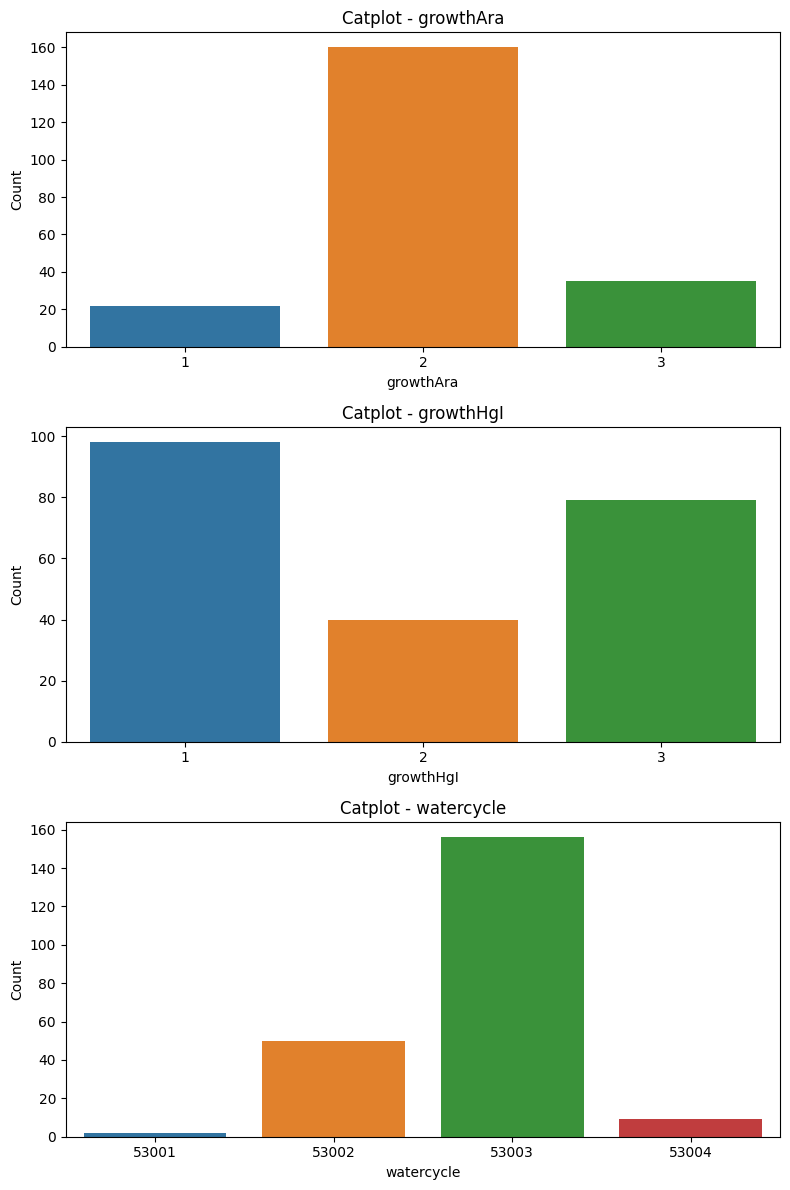

In [8]:
columns = ['growthAra','growthHgI','watercycle']
ig, axes = plt.subplots(len(columns), 1, figsize=(8, len(columns) * 4), sharex=False)

for i, column in enumerate(columns):
    sns.countplot(data=df, x=column, ax=axes[i])
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(column)
    axes[i].set_title(f'Catplot - {column}')

plt.tight_layout()
plt.show()

In [9]:
inertia_list = []
for i in range(2,11):
    km = KMeans(n_clusters=i)
    km.fit(df)
    inertia_list.append(km.inertia_)

c:\users\ahneunjeong\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\users\ahneunjeong\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\users\ahneunjeong\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\users\ahneunjeong\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

<AxesSubplot: >

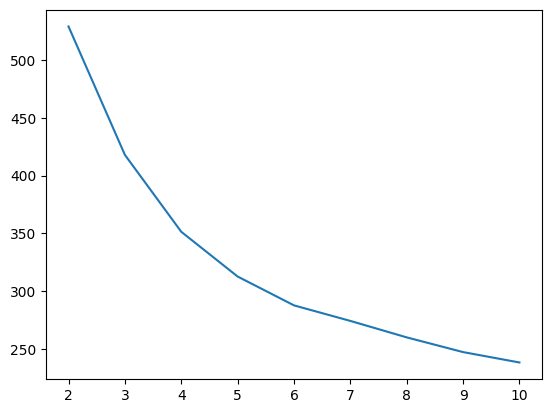

In [10]:
sns.lineplot(x=range(2,11),y=inertia_list)
# 엘보 스코어가 안 보임 

In [11]:
from sklearn.metrics import silhouette_score

In [12]:
score = []
for i in range(2,11):
    km = KMeans(n_clusters=i,random_state=10)
    km.fit(df)
    pred=km.predict(df)
    score.append(silhouette_score(df,pred))

c:\users\ahneunjeong\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\users\ahneunjeong\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\users\ahneunjeong\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\users\ahneunjeong\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

<AxesSubplot: >

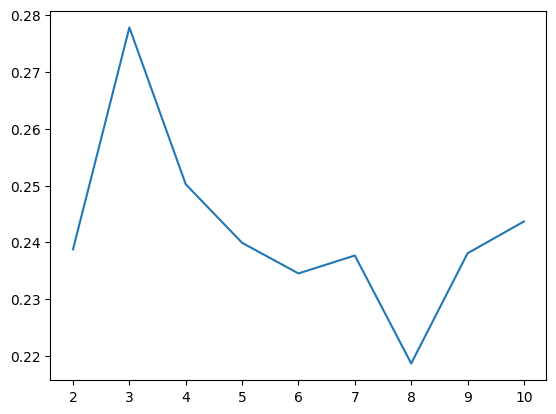

In [13]:
sns.lineplot(x=range(2,11),y=score)

In [14]:
n_clusters = 3

In [15]:
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(df)

c:\users\ahneunjeong\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [16]:
pred = kmeans.predict(df)

In [17]:
pred

array([1, 1, 2, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1,
       1, 1, 0, 1, 2, 0, 2, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 2, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 2, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 1, 2, 2, 1, 0, 1, 1,
       0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 2, 1, 1, 1, 2, 1, 1, 0, 2, 2, 1, 1])

In [18]:
pca = PCA(n_components=4)
printcipalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2', '3','4'])
print(pca.explained_variance_ratio_)

[0.29297288 0.24076829 0.20896004 0.08117838]


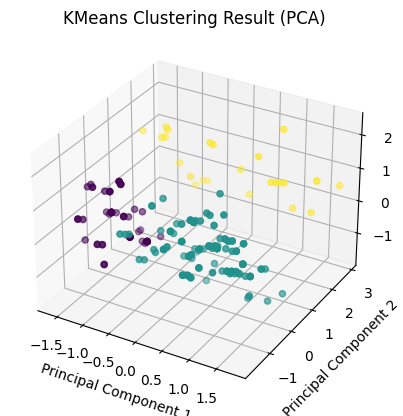

In [19]:
pca = PCA(n_components=3)
df_pca_2 = pca.fit_transform(df)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca_2[:, 0], df_pca_2[:, 1], df_pca_2[:, 2], c=pred)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('KMeans Clustering Result (PCA)')
plt.show()


In [20]:
user_input = {"mlPro_data":np.array([0,0,0,0,2,1,2,58003,53002]), 
              "sy_data" :np.array([0,0,0,0,1,1,2,58002,53003]),
             "ej_data":np.array([0,1,0,0,1,1,3,58001,53002]),
              "yr_data": np.array([0,0,0,1,3,1,2,58003,53004]),
             "plant_Pro_data":np.array([0,0,1,0,1,1,2,58004,53003])}
plant_data = np.array(df)

In [21]:
kmeans = KMeans(n_clusters=3, random_state=42)
plant_clusters = kmeans.fit_predict(plant_data)

c:\users\ahneunjeong\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


맨하탄 유사도

In [29]:
name_list = []
result = []

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [34]:
manhattan_scores = []
def manhattan(user_name, value):
    i = 1
    pca = PCA(n_components=3)
    plant_features_pca = pca.fit_transform(plant_data)
    user_features = pca.transform(value.reshape(1, -1))
    manhattan_scores = manhattan_distances(user_features, plant_features_pca)
    similarities_clustered = 1 / (1+manhattan_scores)
    manhattan_indices = np.argsort(-similarities_clustered, axis=1)
    top_recommendations = manhattan_indices[0][:3]

    for recommendation in top_recommendations:
        plant_index = df.iloc[recommendation].name
        plant_value = df.iloc[recommendation].values
        cntntsSj = df_o.loc[df_o['cntntsNo'] == plant_index, 'cntntsSj'].values[0]
        result.append([plant_index,similarities_clustered[0][recommendation], cntntsSj,plant_value])
        name_list.append(f"{user_name}_{i}")
        i+= 1



    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plotting plant features
    ax.scatter(plant_features_pca[:, 0], plant_features_pca[:, 1], plant_features_pca[:, 2], label='Plants')

    # Plotting user features
    ax.scatter(user_features[:, 0], user_features[:, 1], user_features[:, 2], label='User')

    # Adding labels or annotations
    for i, recommendation in enumerate(top_recommendations):
        plant_index = df.iloc[recommendation].name
        plant_label = f"{plant_index}"
        ax.text(plant_features_pca[recommendation, 0], plant_features_pca[recommendation, 1], plant_features_pca[recommendation, 2], plant_label)

    # Setting plot title and legend
    ax.set_title('Manhattan Distance Visualization')
    ax.legend()

    # Displaying the plot
    plt.show()
    

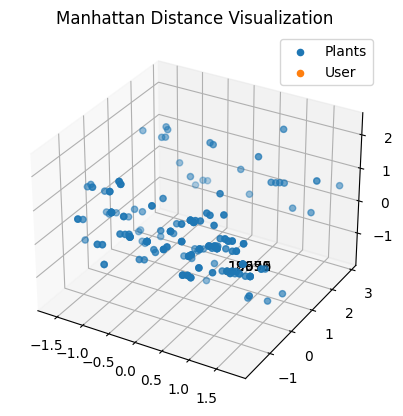

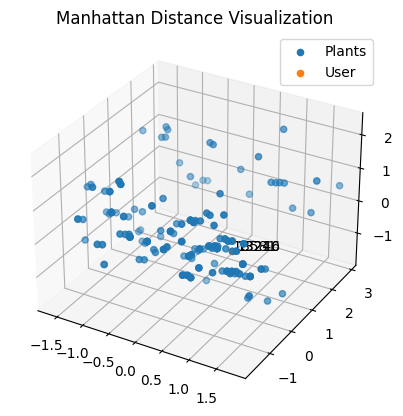

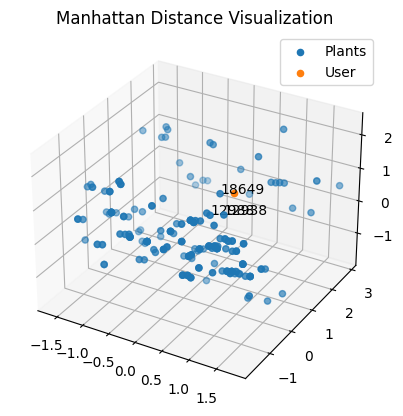

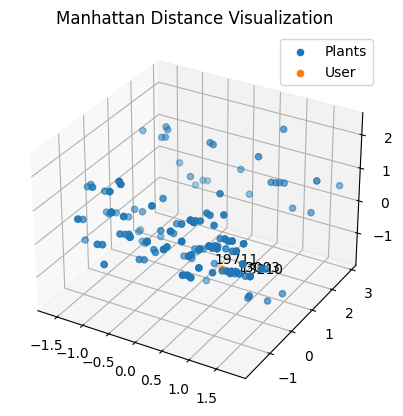

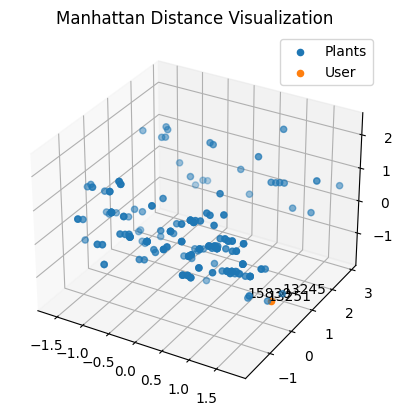

In [35]:
for key, value in user_input.items():
    manhattan(key, value)

In [36]:
show_result = pd.DataFrame(result,columns = (["Plant Index","Similarity Score","식물명","plant Data"]))
show_result.index = name_list

In [37]:
show_result

,Plant Index,Similarity Score,식물명,plant Data
mlPro_data_1,18659,1.000000,박쥐란,"[0, 0, 0, 0, 2, 1, 2, 58003, 53002]"
mlPro_data_2,19696,1.000000,셀라기넬라,"[0, 0, 0, 0, 2, 1, 2, 58003, 53002]"
mlPro_data_3,12971,1.000000,홀리아페페로미아,"[0, 0, 0, 0, 2, 1, 2, 58003, 53002]"
sy_data_1,18581,1.000000,은사철나무,"[0, 0, 0, 0, 1, 1, 2, 58002, 53003]"
sy_data_2,13240,0.903731,페페로미아 오브투시폴리아,"[0, 0, 1, 0, 1, 1, 2, 58002, 53003]"
sy_data_3,13216,0.903731,페페로미아 클루시폴리아,"[0, 0, 1, 0, 1, 1, 2, 58002, 53003]"
ej_data_1,18649,0.718358,뮤렌베키아,"[0, 0, 0, 1, 2, 1, 3, 58001, 53002]"
ej_data_2,12938,0.531045,가울테리아,"[1, 1, 0, 0, 1, 1, 2, 58001, 53003]"
ej_data_3,12988,0.461232,글레코마,"[1, 0, 0, 1, 2, 1, 2, 58001, 53003]"
yr_data_1,19711,0.775173,수염 틸란드시아,"[0, 0, 0, 1, 1, 2, 2, 58003, 53004]"
